In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [12]:
file_path = 'connect4_dataset_new.csv'
dataset = pd.read_csv(file_path)

dataset.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.31,0.32,1.1,1.2,0.33,-1.1,0.34,0.35,0.36,0.37
0,0,0,0,1,0,0,0,0,0,0,...,1,-1,1,-1,1,1,-1,-1,-1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,-1,0,1,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,-1,0,0,-1,0,0,1,0
3,0,0,0,0,0,0,0,0,-1,0,...,0,0,0,1,-1,1,1,-1,1,0
4,0,0,0,0,0,0,0,0,0,-1,...,1,1,1,-1,1,-1,-1,-1,-1,0


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ..............................C=0.01, kernel=linear; total time=  36.9s
[CV] END ..............................C=0.01, kernel=linear; total time=  46.5s
[CV] END ..............................C=0.01, kernel=linear; total time=  53.2s
[CV] END ..............................C=0.01, kernel=linear; total time=  36.4s
[CV] END ..............................C=0.01, kernel=linear; total time=  34.6s
[CV] END .................................C=0.01, kernel=rbf; total time= 1.7min
[CV] END .................................C=0.01, kernel=rbf; total time= 1.5min
[CV] END .................................C=0.01, kernel=rbf; total time= 1.5min
[CV] END .................................C=0.01, kernel=rbf; total time= 1.4min
[CV] END .................................C=0.01, kernel=rbf; total time= 1.5min
[CV] END ................................C=0.01, kernel=poly; total time= 2.0min
[CV] END ................................C=0.01,

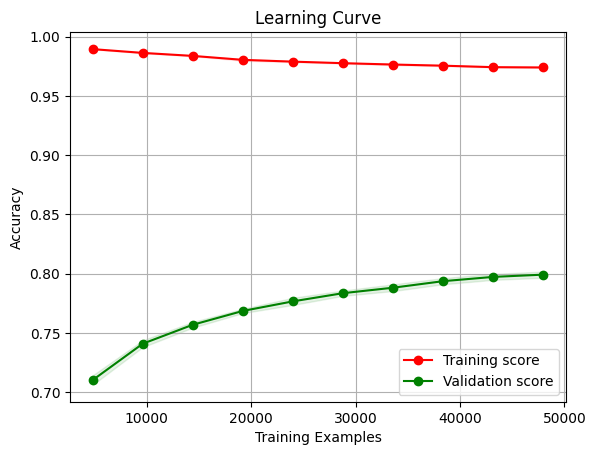

Best Parameters: {'C': 10, 'kernel': 'rbf'}
Training Accuracy: 97.20%
Validation Accuracy: 80.35%
Test Accuracy: 80.52%


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


valid_indices = (y >= 0) & (y <= 6)
X = X[valid_indices]
y = y[valid_indices]


X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42) 


param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly']  # Kernel type
}


grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


train_sizes, train_scores, val_scores = learning_curve(best_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)


plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.grid()


plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")


plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Validation score")

plt.legend(loc="best")
plt.show()


y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)
y_test_pred = best_model.predict(X_test)


train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Best Parameters: {best_params}')
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

In [14]:
import joblib

joblib.dump(best_model, 'svm_model.pkl')

['svm_model.pkl']